# Lab Exercise 03: Exploring Wavenumbers and Spatial Sampling in Temperature Measurements

## Objective:
In this exercise, you will simulate measuring temperature across a field and explore how the spacing between sensors affects your ability to detect spatial features. You will calculate the fundamental wavenumber and Nyquist wavenumber and observe how changing the sensor spacing impacts your measurements.

**Answer** this notebook by updating the **Answers for Part. x** cell by **double clicking and typing your answers in a cell**. After finishing this notebook, upload in your github repository (**meteo203-2425-lastname/exercises/exercise_03_wavenumbers.ipynb**)

---
## Part 1: Simulating Temperature Across a Field

Task: Simulate a temperature field that varies across a 100-meter-wide field. Assume that the temperature varies in a sinusoidal manner across the field.

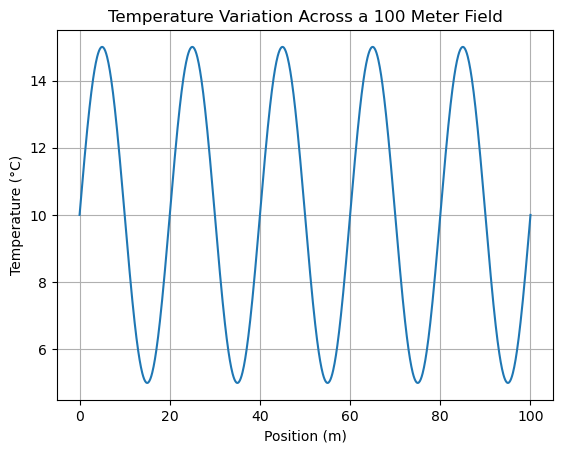

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the length of the field
L = 100 # in meters

# Define the wavelength of the temperature wave (e.g., temperature changes every 20 meters)
wavelength = 20  # meters
k = 2 * np.pi / wavelength  # wavenumber

# Generate positions across the field (fine resolution)
x_fine = np.linspace(0, L, 1000)  # 1000 points across the field

# Generate the temperature variation across the field
temperature = 10 + 5 * np.sin(k * x_fine)  # Sinusoidal temperature wave

# Plot the temperature variation
plt.plot(x_fine, temperature)
plt.title(f"Temperature Variation Across a {L} Meter Field")
plt.xlabel("Position (m)")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()


### Questions:

What does the wavelength represent in this context? How often does the temperature change across the field?

Answer for Part 1:
The wavelength (20m) represents the fluctuation or changes of temperature within the the covered area. So, if we have 100m, there are 5 strong signals of high temperatures and 5 strong signals of low temperatures. In this concept, the temperature shows a diurnal cycle of changing temperature, where there is one peak and one drop of strong signals.

---
## Part 2: Exploring Sensor Spacing

Now, we’ll simulate measuring the temperature using sensors placed at regular intervals across the field.

Task: Change the sensor spacing and observe how well you can capture the temperature wave.

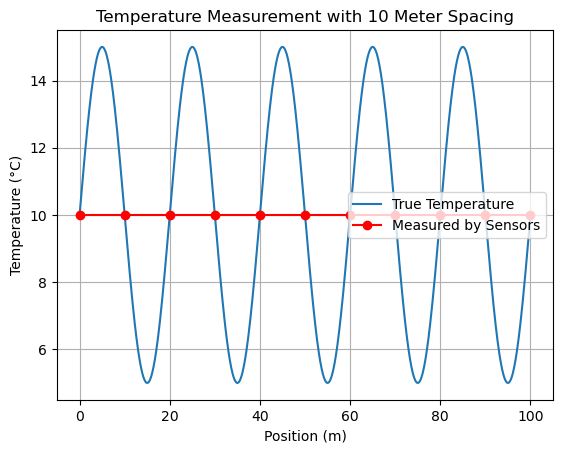

In [11]:
# Define the sensor spacing (e.g., 5 meters)
sensor_spacing = 10  # meters

# Generate positions where the sensors are placed
x_sensors = np.arange(0, L + sensor_spacing, sensor_spacing)  # Sensor positions

# Measure the temperature at the sensor positions
temperature_sensors = 10 + 5 * np.sin(k * x_sensors)

# Plot the temperature measured by the sensors
plt.plot(x_fine, temperature, label="True Temperature")
plt.plot(x_sensors, temperature_sensors, 'o-', label="Measured by Sensors", color='r')
plt.title(f"Temperature Measurement with {sensor_spacing} Meter Spacing")
plt.xlabel("Position (m)")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()


### Questions:

1. How well does the sensor-based measurement (red line) match the true temperature variation?
2. What would happen if the spacing between the sensors was larger? Change the sensor spacing to 10 meters and re-run the code.

In [ ]:
Answer for Part 2:
1. The sensor-based measurement (red line) capacity to capture true measurements (blue line) depends upon the value of sensor spacing value.
   The greater number of sensor spacing value, the higher chance to capture the true measurements and good to note that the sensor spacing
   value must be a factors of 20 (i.e. 1,2,4,5) in order to have a better capture of measurements. In this part, the mentioned factors, 
   1, 2, 4, 5 were the value of sensor spacing to have a better capture of true measurements.
2. As mentioned in item #1, the greater the sensor spacing, tends to decrease the accuracy to capture trend of true measurements.
   Upon changing the sensor spacing to 10, the sensor-based measurement gave a straight horizontal line. And by inspection, this value is the
   average value of the true measurements.

---
## Part 3: Calculating Fundamental and Nyquist Wavenumbers

Task: Calculate the fundamental wavenumber and Nyquist wavenumber for the given scenario.

- The fundamental wavenumber represents the longest wave (or temperature trend) that spans the entire field.
- The Nyquist wavenumber represents the shortest wave that can be detected by your sensors.

In [18]:
# Calculate the fundamental wavenumber
L = 100  # Length of the field in meters
k_0 = 2 * np.pi / L  # Fundamental wavenumber

# Calculate the Nyquist wavenumber based on sensor spacing
sensor_spacing_1 = 5
k_n_1 = np.pi / sensor_spacing  # Nyquist wavenumber

sensor_spacing_2 = 10
k_n_2 = np.pi / sensor_spacing_2  # Nyquist wavenumber

# Print the results
print(f"Fundamental Wavenumber: {k_0:.3f} radians/m")
print(f"Nyquist Wavenumber (with {sensor_spacing_1}m spacing): {k_n_1:.3f} radians/m")
print(f"Nyquist Wavenumber (with {sensor_spacing_2}m spacing): {k_n_2:.3f} radians/m")

Fundamental Wavenumber: 0.063 radians/m
Nyquist Wavenumber (with 5m spacing): 0.628 radians/m
Nyquist Wavenumber (with 10m spacing): 0.314 radians/m


### Questions:

1. What is the fundamental wavenumber? What does this tell you about the largest feature (or longest wave) you can detect in the field?
2. What is the Nyquist wavenumber for 5-meter spacing? What about for 10-meter spacing? How does increasing the sensor spacing affect your ability to detect smaller features?

Answer for Part 3:
1. The fundamental wavenumber is the ideal number of wavelength in a given particular distance. It tells to us that this number of wavelength is
   the ideal for a given length (L). It is also the number of wavelength that will give the highest accuracy of signals for a given set of data
   in order to minimize errors and inaccuracy of data analysis.
2. The Nyquist Wavenumber for 5m is 0.628 rad/m while for 10m is 0.314 rad/m. Increasing the value for sensor spacing tends to decrease the Nyquist     Wavenumber consequently, decrease the ability to detect smaller features or signals for analysis, because of increasing spaces for sensors that
   gathers information due to aliasing.

---
### Part 4: Aliasing and Sampling Resolution

When the sensor spacing becomes too large (i.e. sensors are further apart), we may not be able to detect certain temperature variations correctly due to aliasing. Let's explore this concept.

Task: Increase the sensor spacing to 15 meters and observe the effect.

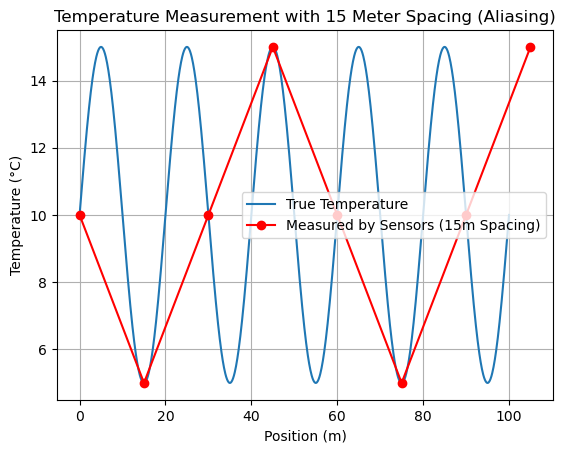

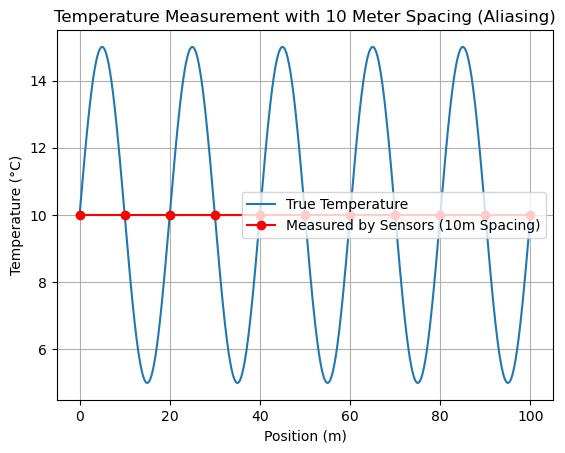

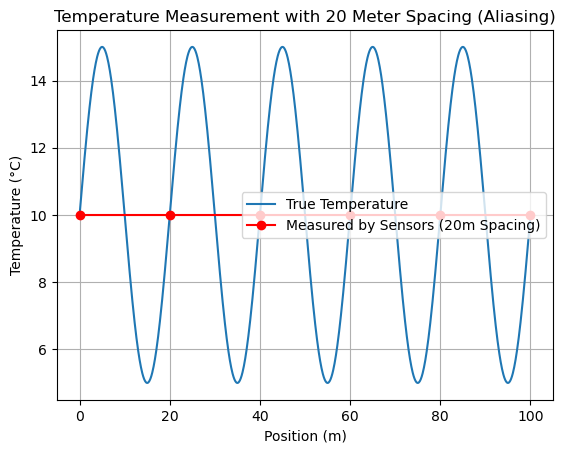

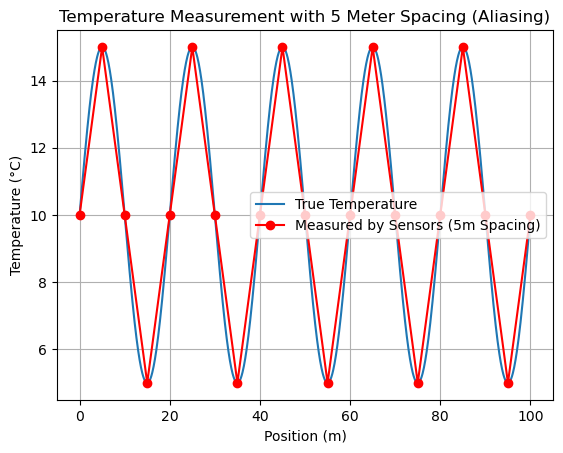

In [28]:
# Increase the sensor spacing to 15 meters
sensor_spacing = 15  # meters
x_sensors = np.arange(0, L + sensor_spacing, sensor_spacing)
temperature_sensors = 10 + 5 * np.sin(k * x_sensors)

# Plot the result
plt.plot(x_fine, temperature, label="True Temperature")
plt.plot(x_sensors, temperature_sensors, 'o-', label="Measured by Sensors (15m Spacing)", color='r')
plt.title("Temperature Measurement with 15 Meter Spacing (Aliasing)")
plt.xlabel("Position (m)")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()

sensor_spacing = 10  # meters
x_sensors = np.arange(0, L + sensor_spacing, sensor_spacing)
temperature_sensors = 10 + 5 * np.sin(k * x_sensors)

# Plot the result
plt.plot(x_fine, temperature, label="True Temperature")
plt.plot(x_sensors, temperature_sensors, 'o-', label="Measured by Sensors (10m Spacing)", color='r')
plt.title("Temperature Measurement with 10 Meter Spacing (Aliasing)")
plt.xlabel("Position (m)")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()

sensor_spacing = 20  # meters
x_sensors = np.arange(0, L + sensor_spacing, sensor_spacing)
temperature_sensors = 10 + 5 * np.sin(k * x_sensors)

# Plot the result
plt.plot(x_fine, temperature, label="True Temperature")
plt.plot(x_sensors, temperature_sensors, 'o-', label="Measured by Sensors (20m Spacing)", color='r')
plt.title("Temperature Measurement with 20 Meter Spacing (Aliasing)")
plt.xlabel("Position (m)")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()

sensor_spacing = 5  # meters
x_sensors = np.arange(0, L + sensor_spacing, sensor_spacing)
temperature_sensors = 10 + 5 * np.sin(k * x_sensors)

# Plot the result
plt.plot(x_fine, temperature, label="True Temperature")
plt.plot(x_sensors, temperature_sensors, 'o-', label="Measured by Sensors (5m Spacing)", color='r')
plt.title("Temperature Measurement with 5 Meter Spacing (Aliasing)")
plt.xlabel("Position (m)")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()

### Questions:

1. What happens to the accuracy of your temperature measurements when the sensor spacing is increased to 15 meters?
2. Explain aliasing in this context. Why does it occur when the sensor spacing exceeds a certain limit?

Answer for Part 4:
1. The measurements using sensor becomes tends to capture good measurements at 15m, but failed to capture true meaurements in  between
   signals, that might result to failure to capture the trends and variability of the temperature and its bahaviour in between.
2. Aliasing in this context is capturing signals and measurements at a certain limit/space. Aliasing sometimes determine the average of a certain
   data sets, or capture the measurement at a certain distance, and this occur because the aliasing failed to capture some signals from the field.
   And when exceeding the sensor space limit, the measurement of aliasing failed to capture the real/true trend and variability of the data. 

### Final Questions

1. How does sensor spacing affect your ability to resolve both large-scale and small-scale temperature changes across the field?
2. How do the fundamental wavenumber and Nyquist wavenumber help you determine the types of temperature variations you can detect?
3. Why is it important to consider both the spatial resolution (sensor spacing) and the wavenumbers when designing a measurement system for temperature or other physical parameters?

In [ ]:
Final Questions for Exercise_03
1. The size of sensor spacing matters in determining both large and small scale trends and variability. The lesser (higher) the sensor spacing, the
   the better (poorer) capture of trend and variability and behaviour of temperature change.
2. The fundamental wavenumber is the number/frequency of signals in order to have a higher accuracy of determining temperature variations,
   while Nyquist number is the minimum number/frequency required in order to assure that the data of information will not lose for analysis,
   such as daily, monthly, seasonal or annual.
3. It is important to consider both spatial resolution and wave numbers when designing measurement systems in order not to lose the information
   and capture necesarry information for analysis of data to be gathered and to have a more accurate measurements and analysis.